<a href="https://colab.research.google.com/github/tseth92/Kaggle/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
# print(os.listdir("../input"))
import warnings
warnings.filterwarnings('ignore')

# Any results you write to the current directory are saved as output.

## Importing relevant libraries:
- missingno gets the missing values  
- seaborn is a nice visualization library built on top of matplotlib  
- oneHotEncoder increases the data dimensionality by increasing the 
- number of columns to the range of integers present  
- labelEncoder

In [0]:
import missingno
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.ticker as ticker
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors

#### changing the directory to ../input as this is the location where dataset
#### is present
os.chdir('../input')
!ls

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
datasetPath = "/mnt/Datasets/Kaggle_Titanic"
if not os.path.exists(datasetPath):
  os.makedirs(datasetPath,777)
os.chdir(datasetPath)
! cp /content/drive/My\ Drive/kaggle/Kaggle_titanic/titanic_dataset.zip .
! ls

!unzip -q '/mnt/Datasets/Kaggle_Titanic/titanic_dataset.zip'
!ls
os.chdir(datasetPath+'/titanic_dataset')

titanic_dataset.zip
titanic_dataset  titanic_dataset.zip


## Loading all the CSVs
load the csvs to respective dataframe objects

In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

In [0]:
display("----------------train----------------")
display(train.head())
display("----------------test----------------")
display(test.head())
display("----------------gender_submission----------------")
display(gender_submission.head())

'----------------train----------------'

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


'----------------test----------------'

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


'----------------gender_submission----------------'

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [0]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


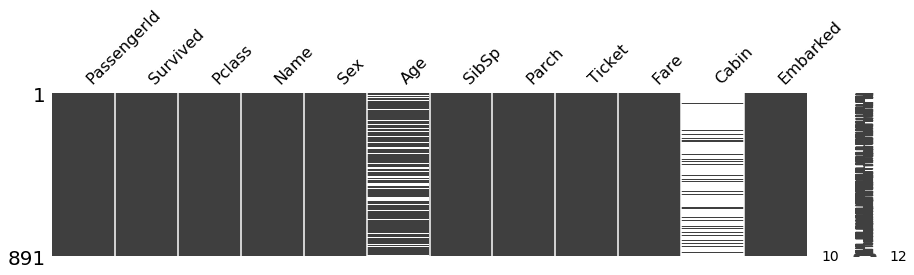

In [0]:
#missingno contains all the missing numbers in form of matrix
missingno.matrix(train, figsize=(15,3))

In [0]:
# create train_sel as a dataframe in which we will store the features one by one
# which we need
train_sel = pd.DataFrame()

In [0]:
# missing_values will contain the number of missing values for all the features
missing_values = {}
def countMissingNumbers(train):
    df_len = len(train)
    for train_col in train.columns:
        missing_values[train_col] = df_len-train[train_col].value_counts().sum()
countMissingNumbers(train)
print(missing_values)

{'PassengerId': 0, 'Survived': 0, 'Pclass': 0, 'Name': 0, 'Sex': 0, 'Age': 177, 'SibSp': 0, 'Parch': 0, 'Ticket': 0, 'Fare': 0, 'Cabin': 687, 'Embarked': 2}


## Performing EDA on the train data:
Now, we will go through all the features one by one to determine which ones to select for final analysis and if any changes are required for these as well

### Feature: Survived
This feature is binary value with either 0(did not survive) or 1(survived). So, this will be aur classification target variable

0    549
1    342
Name: Survived, dtype: int64


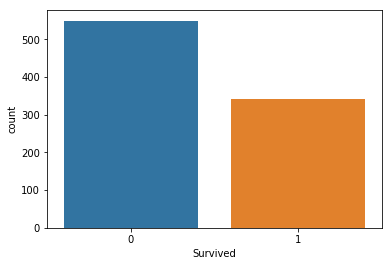

In [0]:
import timeit
# value_counts gives the number of unique values in the dataframe
# countplot gives the visual representation of the number of values
print(train.Survived.value_counts())
sns.countplot(train['Survived'])

In [0]:
# populate df_bin and df_con with the Survived feature
train_sel['Survived'] = train.Survived
print(train_sel.head())

   Survived
0         0
1         1
2         1
3         1
4         0


### Feature: PClass
Ticket class: 1st 2nd 3rd

Missing values in Pclass:  0


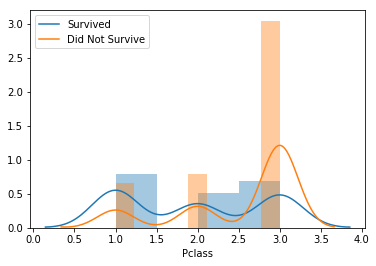

In [0]:
print('Missing values in Pclass: ', missing_values['Pclass'])
# distribution plot : to check the spread of data in case any outliers are there:
#fig = plt.figure(figsize=(15,3))
#print(train.loc[train['Survived']==1][train['Embarked']=='S']['Pclass'])
sns.distplot(train.loc[train['Survived']==1]['Pclass'], kde_kws={'label': 'Survived'})
sns.distplot(train.loc[train['Survived']==0]['Pclass'], kde_kws={'label': 'Did Not Survive'})
#train.head()

**Observation**: This shows that more of 1st and 2nd class passengers survived than 3rd class passenger

In [0]:
# Since the values provide some insight for target data, Pclass can be used for analysis of this problem
train_sel['Pclass'] = train['Pclass']
display(train_sel.head(5))

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


### Feature: Name
Since the below value_counts shows that all are unique values, so this feature will never be helpful in our analysis of ML

In [0]:
display(train.Name.value_counts().head(5))
display(train.Name.head(5))

Svensson, Mr. Olof           1
Vovk, Mr. Janko              1
Risien, Mr. Samuel Beard     1
Rice, Master. George Hugh    1
Van Impe, Miss. Catharina    1
Name: Name, dtype: int64

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [0]:
# using apply
#%timeit train['NameTitle'] = train['Name'].\
#                                 apply(lambda x: 'Mrs.' if 'Mrs' in x else \
#                                 ('Mr' if 'Mr' in x else\
#                                 ('Miss' if 'Miss' in x else\
#                                 ('Master' if 'Master' in x else 'None'))))

# using list comprehension:
%timeit train['NameTitle'] = ['Mrs.' if 'Mrs' in x else 'Mr' if 'Mr' in x else\
                              ('Miss' if 'Miss' in x else \
                               ('Master' if 'Master' in x else 'None'))\
                                for x in train['Name']]

train['NameTitle'] = train['Name'].apply(lambda x: x.split(' ')[1]).\
                                    apply(lambda x: x if '.' in x else 'None')


The slowest run took 6.17 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 558 µs per loop


In [0]:
display(train.NameTitle.value_counts())

Mr.          502
Miss.        179
Mrs.         121
Master.       40
None          25
Dr.            7
Rev.           6
Major.         2
Col.           2
Mlle.          2
Don.           1
Jonkheer.      1
Capt.          1
Ms.            1
Mme.           1
Name: NameTitle, dtype: int64

In [0]:
train.NameTitle.unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'None', 'Don.', 'Rev.', 'Dr.',
       'Mme.', 'Ms.', 'Major.', 'Mlle.', 'Col.', 'Capt.', 'Jonkheer.'],
      dtype=object)

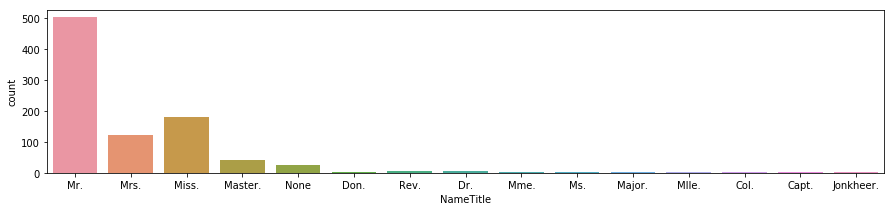

In [0]:
fig = plt.figure(figsize=(15,3))
sns.countplot(train.NameTitle)

In [0]:
print((train.loc[train.Survived==1]['NameTitle']).value_counts())

Miss.      126
Mrs.        97
Mr.         79
Master.     23
None         8
Dr.          3
Mlle.        2
Major.       1
Col.         1
Ms.          1
Mme.         1
Name: NameTitle, dtype: int64


{'Mr.': 0, 'Mrs.': 1, 'Miss.': 2, 'Master.': 3, 'None': 4, 'Don.': 5, 'Rev.': 6, 'Dr.': 7, 'Mme.': 8, 'Ms.': 9, 'Major.': 10, 'Mlle.': 11, 'Col.': 12, 'Capt.': 13, 'Jonkheer.': 14}


([<matplotlib.axis.XTick at 0x7f5a829969b0>,
 <a list of 15 Text xticklabel objects>)

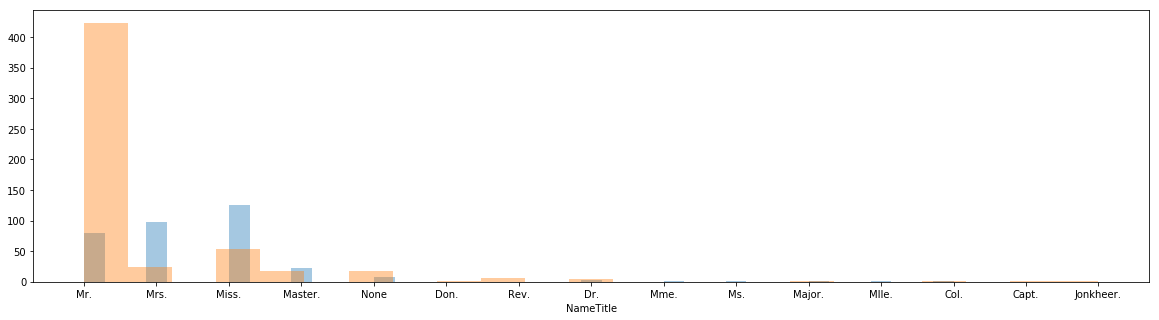

In [0]:
nameTitleDict = {}
for i,x in enumerate(train.NameTitle.unique()):
    nameTitleDict[x] = i
print(nameTitleDict)
fig = plt.figure(figsize=(20,5))
sns.distplot(train.loc[train.Survived==1]['NameTitle'].apply(lambda x: nameTitleDict[x] ), kde_kws={'label': 'Survived'}, kde=False)
sns.distplot(train.loc[train.Survived==0]['NameTitle'].apply(lambda x: nameTitleDict[x] ), kde_kws={'label': 'Did not Survive'}, kde=False)
xlabels = train.NameTitle.unique()
plt.xticks(range(len(xlabels)),xlabels)
#sns.catplot(x="sexf", y="survived", hue="class", kind="bar", data=train['Name']);
#g = sns.catplot(x="Sex", y="Survived",data=train, saturation=.5, kind="bar", ci=None, aspect=.6)

In [0]:
# Since Name didn't provide any value to data as such, but Name did have titles , which can be used to get some insights from the data.
# Hence adding NameTitle to our dataframe which will be used to predict using machine learning models
train_sel['NameTitle'] = train['NameTitle']

**Observation**: Here, it can be easily seen that most percentage of children survived, followed by ladies and very less percentage of males survived. Hence, ladies and children had much more chance of survival in Titanic

### Feature: Sex
Since Sex is either male of female, this can be considered as a feature

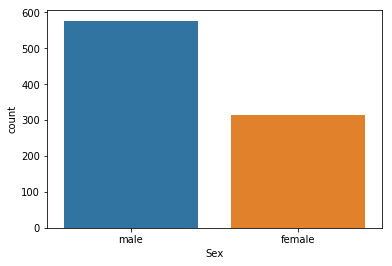

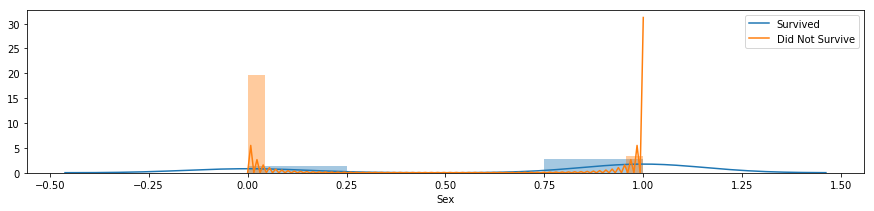

In [0]:
train['Sex']
sns.countplot(train['Sex'])
fig = plt.figure(figsize=(15,3))
# plotting Sex in case of survived and non survived values
sns.distplot(train.loc[train['Survived']==1]['Sex'].\
             apply(lambda x: 1 if x=='female' else 0),\
             kde_kws={'label': 'Survived'})
sns.distplot(train.loc[train['Survived']==0]['Sex'].\
             apply(lambda x: 1 if x=='female' else 0),\
             kde_kws={'label': 'Did Not Survive'})

**Observation**:: Hence, survival rate for Females (1) are found to be more than those of males(0)

In [0]:
# Hence, Sex is an important feature and let's add it to our dataframes
train_sel['Sex'] = train['Sex'].apply(lambda x: 1 if x=='female' else 0)
#Since the computers understand numbers, let's assign each gender cell as 0 in case of male and 1 in case of females
display(train_sel.head(5))

,Survived,Pclass,NameTitle,Sex
0,0,3,Mr.,0
1,1,1,Mrs.,1
2,1,3,Miss.,1
3,1,1,Mrs.,1
4,0,3,Mr.,0


### Feature: Age

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NameTitle,tempAge
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,adults
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,adults
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,adults
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,adults
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,adults
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr.,unknown
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr.,seniorCitizen
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master.,kids
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs.,adults
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs.,children


----------------------------------tempAge done-----------------------


([<matplotlib.axis.XTick at 0x7f5a8279db70>,
 <a list of 5 Text xticklabel objects>)

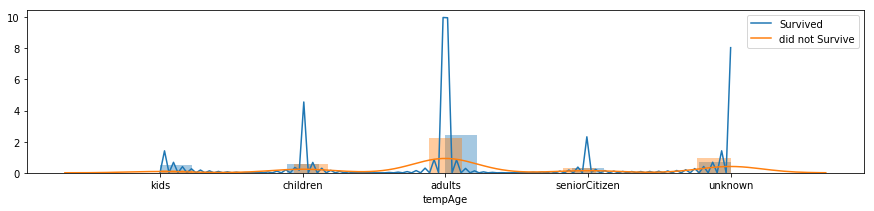

In [0]:

#plot_count_dist(train['Age'], 'Age', df_bin, label_column='Survived',figsize=(20,5))
#print(df_bin['Age'].describe())
#df_bin = df_bin.drop(['tempAge'], axis=1)
#display(train.head(5))
#display(train.info())
train['tempAge'] = train['Age']
#display(train.head(5))
bins = [0,10,20,50,80]
train['tempAge'] = pd.cut(train['tempAge'], bins=bins, labels=['kids','children','adults','seniorCitizen'])
train['tempAge'] = train['tempAge'].replace(np.nan, 'unknown')
display(train.head(10))
print('----------------------------------tempAge done-----------------------')
fig = plt.figure(figsize=(15,3))
#sns.countplot(train['tempAge'])
agemap = {'kids':0, 'children':1, 'adults':2, 'seniorCitizen':3, 'unknown':4}

#ageList = ['kids', 'children', 'adults', 'seniorCitizen', 'unknown']
sns.distplot(train.loc[train['Survived']==1]['tempAge'].apply(lambda x: agemap[x]), kde_kws={'label': 'Survived'})
ax = sns.distplot(train.loc[train['Survived']==0]['tempAge'].apply(lambda x: agemap[x]), kde_kws={'label': 'did not Survive'})
xlabels = agemap
plt.xticks(range(len(xlabels)),xlabels)

In [0]:
train_sel['Age'] = train['tempAge']
train = train.drop(['tempAge'], axis=1)

### Feature: Sibsp
Number of siblings / spouses aboard the Titanic

0    1
1    1
2    0
3    1
4    0
Name: SibSp, dtype: int64


0

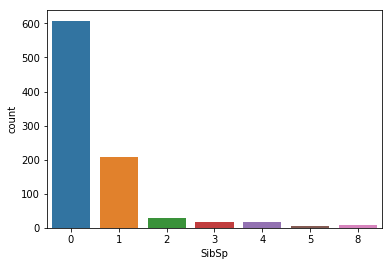

In [0]:
print(train['SibSp'].head())
train['SibSp'].value_counts()
sns.countplot(train['SibSp'])
missing_values['SibSp']

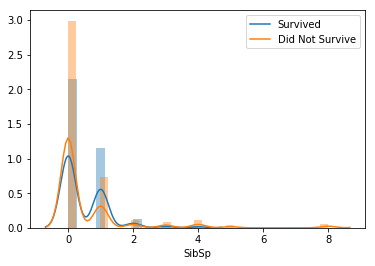

In [0]:
# This qualifies to be added to train_sel
train_sel['SibSp'] = train['SibSp']
sns.distplot(train.loc[train['Survived']==1]['SibSp'], kde_kws={'label': 'Survived'})
sns.distplot(train.loc[train['Survived']==0]['SibSp'], kde_kws={'label': 'Did Not Survive'})

In [0]:
# let's make a generic method which we will be using again and again for plotting hte graphs
def plot_count_dist(data, feature, df_bin,
                    label_column='Survived',figsize=(20,5)):
    missing_values[feature]
    sns.countplot(data)
    fig = plt.figure(figsize=figsize)
    sns.distplot(train.loc[train[label_column]==1][feature], kde_kws={'label': 'Survived'})
    sns.distplot(train.loc[train[label_column]==0][feature], kde_kws={'label': 'Did not Survive'})

### Feature: Parch
Number of parents / children aboard the Titanic

In [0]:
missing_values['Parch']
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

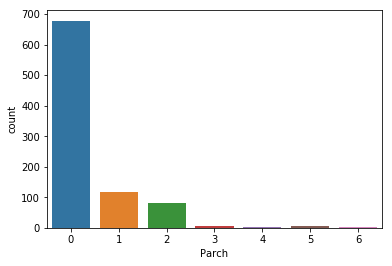

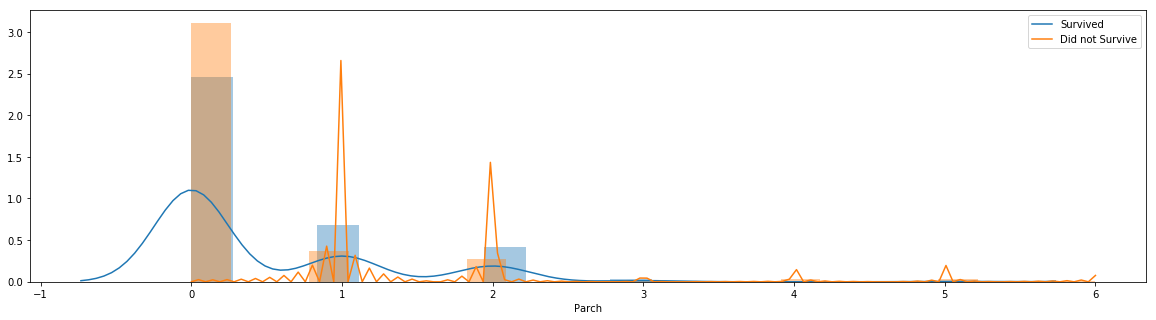

In [0]:
plot_count_dist(train['Parch'], 'Parch', train_sel, label_column='Survived',figsize=(20,5))

In [0]:
# this shows that chances of survival are more if one is having parent or children
# hence, we need this feature in our dataframes
train_sel['Parch'] = train['Parch']
train_sel.head(5)

,Survived,Pclass,NameTitle,Sex,Age,SibSp,Parch
0,0,3,Mr.,0,adults,1,0
1,1,1,Mrs.,1,adults,1,0
2,1,3,Miss.,1,adults,0,0
3,1,1,Mrs.,1,adults,1,0
4,0,3,Mr.,0,adults,0,0


In [0]:
missing_values['Ticket']
train['Ticket'].value_counts()

1601                  7
CA. 2343              7
347082                7
3101295               6
347088                6
CA 2144               6
382652                5
S.O.C. 14879          5
LINE                  4
4133                  4
PC 17757              4
2666                  4
17421                 4
19950                 4
347077                4
113781                4
W./C. 6608            4
113760                4
349909                4
29106                 3
230080                3
239853                3
371110                3
248727                3
C.A. 34651            3
24160                 3
35273                 3
110152                3
13502                 3
345773                3
                     ..
8471                  1
29103                 1
383121                1
3101277               1
F.C.C. 13531          1
A/5 3536              1
C.A. 33111            1
STON/O 2. 3101274     1
394140                1
347743                1
SC/AH 3085      

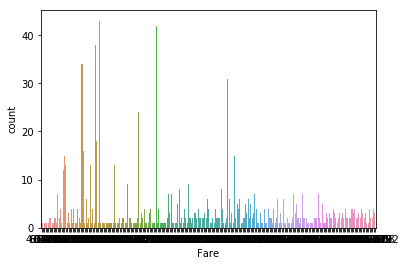

In [0]:
train.Fare.value_counts()
sns.countplot(train.Fare)

> Since ticket has very high dimensionality, so either reduce the dimensions by combining some of the rows or ignore this column

> ### Feature: Fare

In [0]:
train.Fare.value_counts()
train.Fare.max()

512.3292

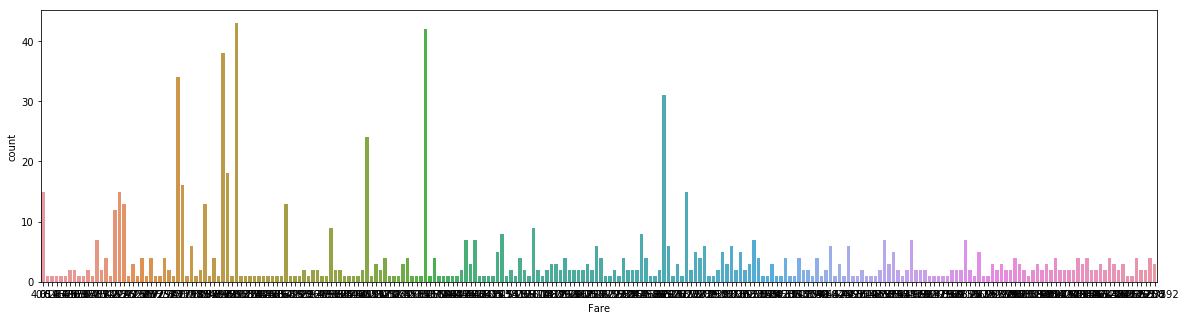

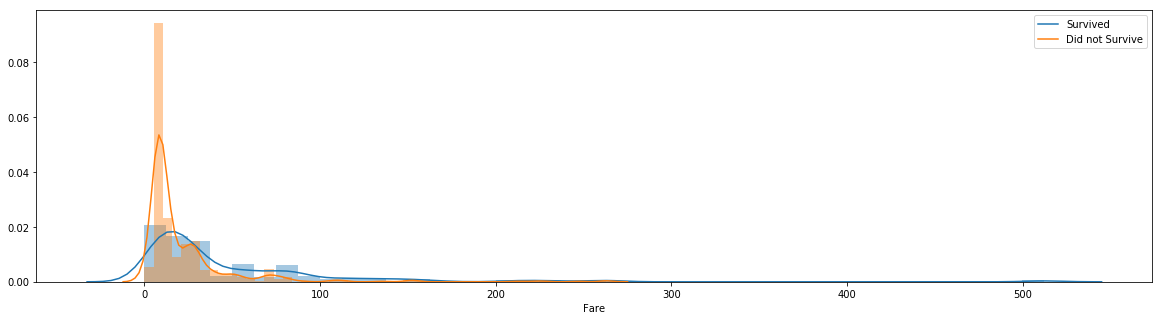

In [0]:
fig = plt.figure(figsize=(20,5))
plot_count_dist(train['Fare'], 'Fare', train_sel, label_column='Survived',figsize=(20,5))

This shows that around 50-100 $ fare was a feature responsible in survival somehow. Hence, add Fare to dataframes

'retbins: '

array([ -0.5123292, 102.46584  , 204.93168  , 307.39752  , 409.86336  ,
       512.3292   ])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
NameTitle    891 non-null object
Sex          891 non-null int64
Age          891 non-null object
SibSp        891 non-null int64
Parch        891 non-null int64
Fare         891 non-null category
dtypes: category(1), int64(5), object(2)
memory usage: 49.8+ KB


None

'fare_dict: '

{'(-0.512, 102.466]': 1,
 '(102.466, 204.932]': 2,
 '(204.932, 307.398]': 3,
 '(307.398, 409.863]': 4,
 '(409.863, 512.329]': 5}

,Survived,Pclass,NameTitle,Sex,Age,SibSp,Parch,Fare
0,0,3,Mr.,0,adults,1,0,"(-0.512, 102.466]"
1,1,1,Mrs.,1,adults,1,0,"(-0.512, 102.466]"
2,1,3,Miss.,1,adults,0,0,"(-0.512, 102.466]"
3,1,1,Mrs.,1,adults,1,0,"(-0.512, 102.466]"
4,0,3,Mr.,0,adults,0,0,"(-0.512, 102.466]"


,Survived,Pclass,NameTitle,Sex,Age,SibSp,Parch,Fare
0,0,3,Mr.,0,adults,1,0,1
1,1,1,Mrs.,1,adults,1,0,1
2,1,3,Miss.,1,adults,0,0,1
3,1,1,Mrs.,1,adults,1,0,1
4,0,3,Mr.,0,adults,0,0,1


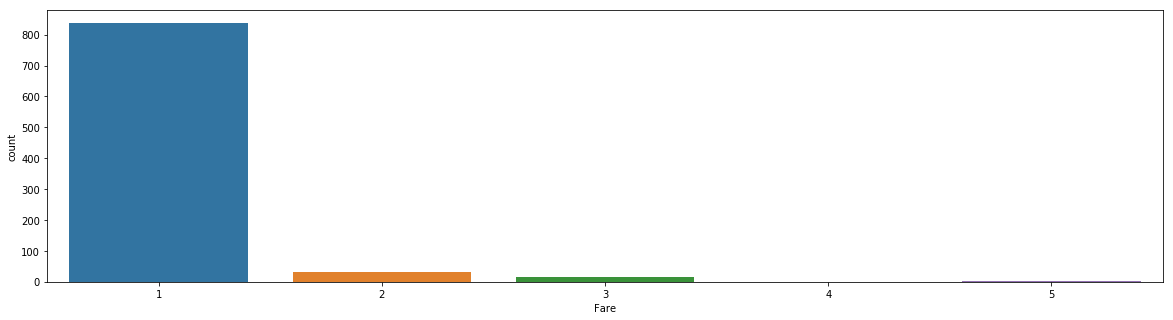

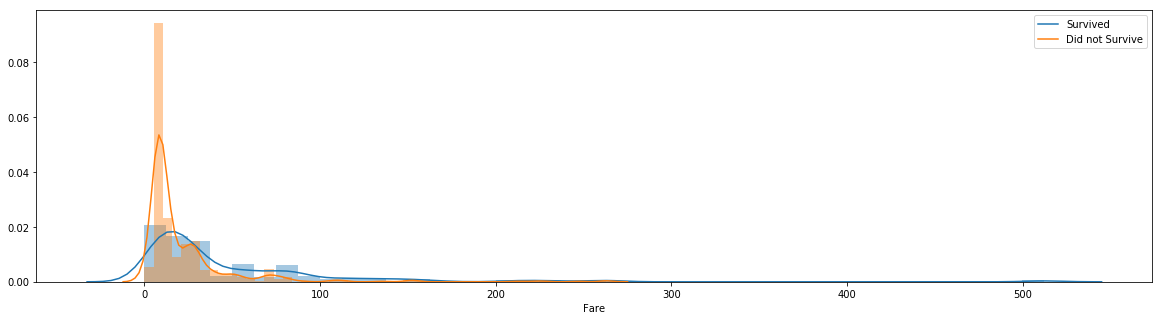

In [0]:
from IPython.display import display
fig = plt.figure(figsize=(20,5))
bins_custom = 0
bins = [0,5,7,100,300,500]
train_sel['Fare'],rbins = pd.cut(train['Fare'], bins=5, retbins=True)
display('retbins: ',rbins)
display(train_sel.info())
fare_dict={}

for i in range(len(rbins) - 1) :
    fare_dict['('+str(round(rbins[i],3))+', '+str(round(rbins[i+1],3))+']'] = i+1
display("fare_dict: ",fare_dict)
display(train_sel.head(5))
train_sel['Fare'] = train_sel['Fare'].apply(lambda x: fare_dict[str(x)])
display(train_sel.head(5))

plot_count_dist(train_sel['Fare'], 'Fare', train_sel, label_column='Survived',\
                figsize=(20,5))

**Observation**: Thus, The persons who had bought tickets for fares between 50 to 100 dollars had higher chances of survival

### Feature: Cabin
Cabin number

In [0]:
from IPython.display import display
display(train['Cabin'].head(5))
display('Missing values for cabin are: ', missing_values['Cabin'])
display(train['Cabin'].value_counts())

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

'Missing values for cabin are: '

687

C23 C25 C27    4
G6             4
B96 B98        4
D              3
C22 C26        3
F33            3
E101           3
F2             3
B20            2
D17            2
B18            2
E44            2
B58 B60        2
B22            2
D33            2
E8             2
D35            2
B5             2
C124           2
C78            2
D36            2
E24            2
C83            2
E121           2
C92            2
F4             2
E67            2
B28            2
D26            2
C68            2
              ..
C70            1
D30            1
C82            1
C148           1
C118           1
A34            1
C86            1
B37            1
C54            1
E12            1
C46            1
A14            1
E58            1
E50            1
B39            1
A20            1
B41            1
B78            1
C110           1
A23            1
B4             1
B102           1
A7             1
E63            1
A36            1
C95            1
B101           1
B50           

Since most of the values are missing, let's drop this column

### Feature: Embarked
 Port of Embarkation:: C = Cherbourg, Q = Queenstown, S = Southampton

In [0]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NameTitle
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


In [0]:
#train.Ticket

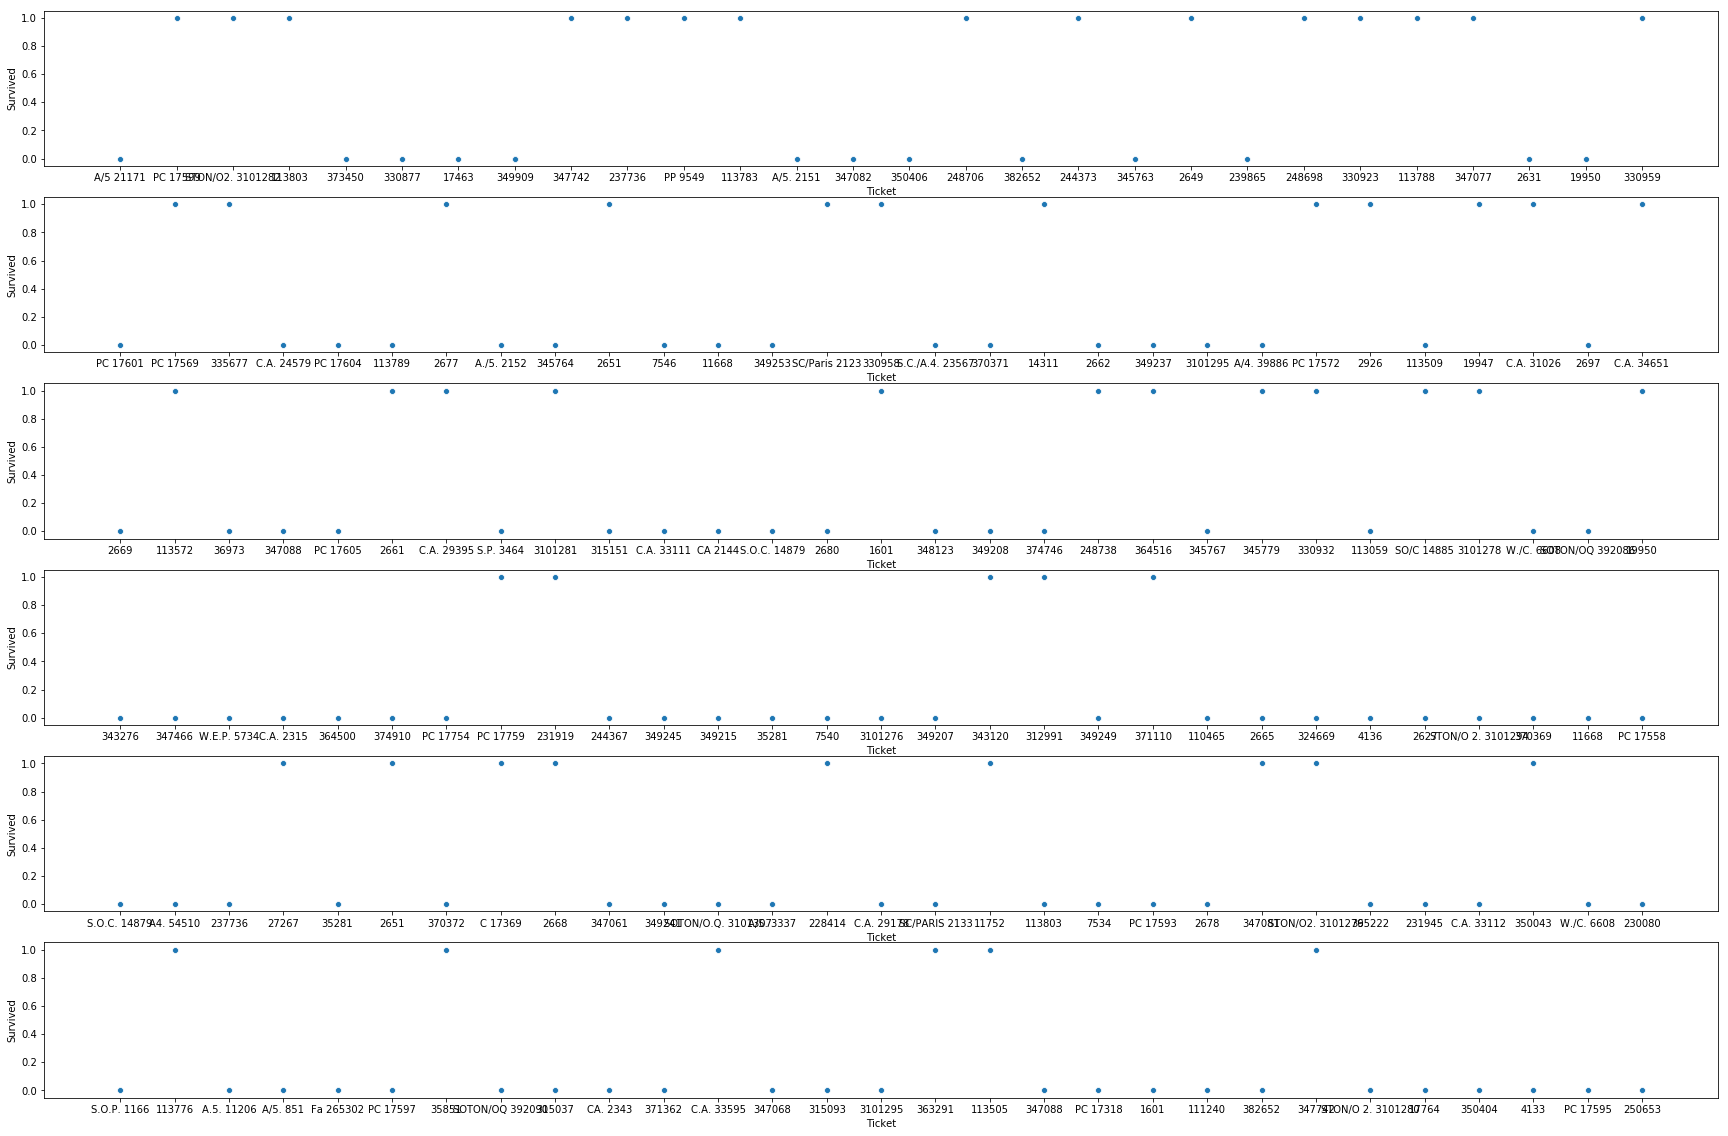

In [0]:
#sns.distplot(train.loc[train.Survived==1]['Ticket'].apply(lambda x: x for i in train.Ticket), kde_kws={'label': 'Survived'})
fig,ax = plt.subplots(6, 1, figsize=(30,20))
sns.scatterplot(x='Ticket', y='Survived', data=train.iloc[:29], ax=ax[0])
sns.scatterplot(x='Ticket', y='Survived', data=train.iloc[30:59], ax=ax[1])
sns.scatterplot(x='Ticket', y='Survived', data=train.iloc[60:89], ax=ax[2])
sns.scatterplot(x='Ticket', y='Survived', data=train.iloc[90:119], ax=ax[3])
sns.scatterplot(x='Ticket', y='Survived', data=train.iloc[120:149], ax=ax[4])
sns.scatterplot(x='Ticket', y='Survived', data=train.iloc[150:179], ax=ax[5])

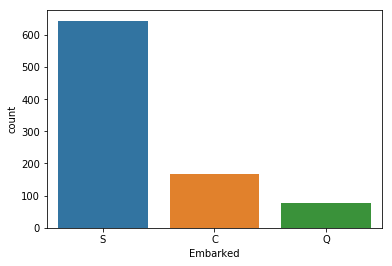

In [0]:
missing_values['Embarked']
sns.countplot(train.Embarked)

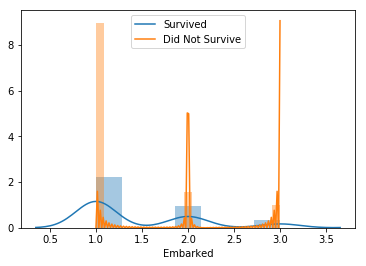

In [0]:
sns.distplot(train.loc[train.Survived==1]['Embarked'].apply(lambda x: 1 if x=='S' else( 2 if x=='C' else 3)), kde_kws={'label': 'Survived'})
sns.distplot(train.loc[train.Survived==0]['Embarked'].apply(lambda x: 1 if x=='S' else( 2 if x=='C' else 3)), kde_kws={'label': 'Did Not Survive'})

**Observation**:  Hence, we can observe that people who embarked from SouthAmpton, had lesser chance of survival , compared to other two

In [0]:
train_sel['Embarked'] = train['Embarked']

In [0]:
# Since there are just 2 missing values in Embarked, lets remove those rows from our dataframes
train_sel = train_sel.dropna(subset=['Embarked'])


### Feature Encoding (Label/OneHot)
 Feature Encoding involves categorical data to be converted to numerical data and making data easily accessible by computer. Hence, some encoding like oneHot encoding is used
 
 **Ordinal Relationship**(where label Encoding doesn't work and we have to go with one hot encoding)

For example, suppose you have a variable, economic status, with three categories (low, medium and high).  In addition to being able to classify people into these three categories, you can order the categories as low, medium and high. Now consider a variable like educational experience (with values such as elementary school graduate, high school graduate, some college and college graduate). These also can be ordered as elementary school, high school, some college, and college graduate.  Even though we can order these from lowest to highest, the spacing between the values may not be the same across the levels of the variables. Say we assign scores 1, 2, 3 and 4 to these four levels of educational experience and we compare the difference in education between categories one and two with the difference in educational experience between categories two and three, or the difference between categories three and four. The difference between categories one and two (elementary and high school) is probably much bigger than the difference between categories two and three (high school and some college).  In this example, we can order the people in level of educational experience but the size of the difference between categories is inconsistent (because the spacing between categories one and two is bigger than categories two and three).  If these categories were equally spaced, then the variable would be an interval variable

**Why does it matter whether a variable is categorical, ordinal or interval?**

 Statistical computations and analyses assume that the variables have a specific levels of measurement.  For example, it would not make sense to compute an average hair color.  An average of a categorical variable does not make much sense because there is no intrinsic ordering of the levels of the categories.  Moreover, if you tried to compute the average of educational experience as defined in the ordinal section above, you would also obtain a nonsensical result.  Because the spacing between the four levels of educational experience is very uneven, the meaning of this average would be very questionable.  In short, an average requires a variable to be interval.
 
Depending on the data we have, we might run into situations where, after label encoding, we might confuse our model into thinking that a column has data with some kind of order or hierarchy, when we clearly don’t have it. To avoid this, we ‘OneHotEncode’ that column.

What one hot encoding does is, it takes a column which has categorical data, which has been label encoded, and then splits the column into multiple columns. The numbers are replaced by 1s and 0s, depending on which column has what value

In [0]:
# oneHot encoding expands columns so that all the data is represented in terms of only 1's and 0's

train_sel_enc = pd.get_dummies(train_sel, columns=['Pclass','Sex','SibSp', 'Parch', 'NameTitle','Fare', 'Embarked', 'Age'])
#df_bin_enc = pd.get_dummies(df_bin, columns=['Pclass','Sex','SibSp', 'Parch','Fare', 'Embarked'])
y_train = train_sel_enc['Survived']
df_bin_enc = train_sel_enc.drop(['Survived'], axis=1)
X_train = train_sel_enc
print(X_train.columns)

#print(len(X_train.index))
#print(len(y_train.index))

Index(['Survived', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_0', 'Sex_1',
       'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5',
       'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4',
       'Parch_5', 'Parch_6', 'NameTitle_Capt.', 'NameTitle_Col.',
       'NameTitle_Don.', 'NameTitle_Dr.', 'NameTitle_Jonkheer.',
       'NameTitle_Major.', 'NameTitle_Master.', 'NameTitle_Miss.',
       'NameTitle_Mlle.', 'NameTitle_Mme.', 'NameTitle_Mr.', 'NameTitle_Mrs.',
       'NameTitle_Ms.', 'NameTitle_None', 'NameTitle_Rev.', 'Fare_1', 'Fare_2',
       'Fare_3', 'Fare_4', 'Fare_5', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Age_adults', 'Age_children', 'Age_kids', 'Age_seniorCitizen',
       'Age_unknown'],
      dtype='object')


### Plotting Heatmap to visualize the correlation between the features:

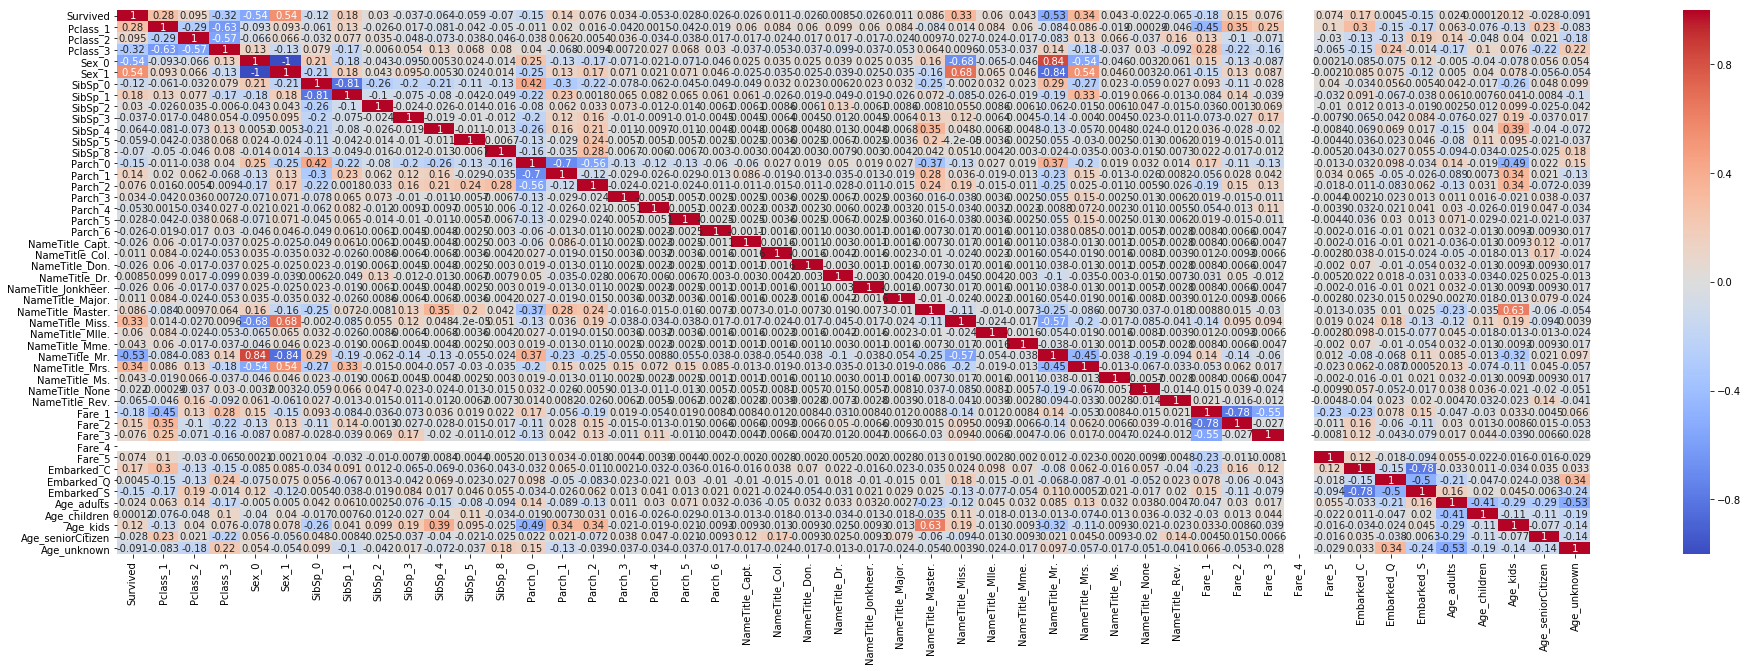

In [0]:
plt.figure(figsize=(33,10))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm')

**For machine learning, you almost definitely want to use sklearn.OneHotEncoder. For other tasks like simple analyses, you might be able to use pd.get_dummies, which is a bit more convenient.**
 
**Note** that sklearn.OneHotEncoder has been updated in the latest version so that it does accept strings for categorical variables, as well as integers.

## Running Machine Learning Models

In [0]:
import time
from sklearn import model_selection, metrics
def fit_sklearn_ml_algos(algo, X_train, y_train):
    model = algo.fit(X_train, y_train)
    #print(model)
    acc = round(model.score(X_train, y_train)*100, 2)
    #print("accuracy is: ", acc)
    
    train_prediction = model_selection.cross_val_predict(algo,
                                                        X_train,
                                                        y_train,
                                                        cv=10)
    #X_train['train_prediction'] = train_prediction
    #X_train['train_prediction_diff'] = train_prediction
    #display('x_train is:')
    #print(X_train.head(5))
    #X_train['train_prediction_diff'] = X_train.apply(lambda x: X_train['train_prediction']==y_train)
    #print('train_prediction_diff value counts')
    #print(X_train['train_prediction_diff'].value_counts())
    #print('y_train: ', y_train)
    acc_cv = round(metrics.accuracy_score(y_train, train_prediction)*100, 2)
    return train_prediction, acc, acc_cv

In [0]:
#X_train.drop(X_train.columns.str.startswith('NameTitle').columns, axis=1)
#X_train = X_train.drop(X_train.filter(regex='Name').columns, axis=1)

### Logistic Regression

In [0]:
train_sel_enc.head(5)

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,NameTitle_Capt.,NameTitle_Col.,NameTitle_Don.,NameTitle_Dr.,NameTitle_Jonkheer.,NameTitle_Major.,NameTitle_Master.,NameTitle_Miss.,NameTitle_Mlle.,NameTitle_Mme.,NameTitle_Mr.,NameTitle_Mrs.,NameTitle_Ms.,NameTitle_None,NameTitle_Rev.,Fare_1,Fare_2,Fare_3,Fare_4,Fare_5,Embarked_C,Embarked_Q,Embarked_S,Age_adults,Age_children,Age_kids,Age_seniorCitizen,Age_unknown
0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0
1,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
2,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0
3,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0
4,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0


In [0]:
from sklearn.model_selection import GridSearchCV
penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
solver = ['liblinear', 'saga']

param_grid = dict(penalty=penalty,
                  C=C,
                  class_weight=class_weight,
                  solver=solver)

grid = GridSearchCV(estimator=LogisticRegression(),
                    param_grid=param_grid,
                    scoring='roc_auc',
                    verbose=1,
                    n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 3 folds for each of 128 candidates, totalling 384 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    6.9s


Best Score:  1.0
Best Params:  {'C': 0.1, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'l1', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 384 out of 384 | elapsed:   11.9s finished


In [0]:
startTime = time.time()
print(X_train.columns)

#train_pred_log, acc_log, acc_cv_log = fit_sklearn_ml_algos(LogisticRegression(),
#                                                         X_train,
#                                                         y_train)

model = LogisticRegression().fit(X_train, y_train)
acc = round(model.score(X_train, y_train)*100, 2)
print("accuracy is: ", acc)

train_prediction = model_selection.cross_val_predict(LogisticRegression(C=0.1, class_weight={1:0.5, 0:0.5}, penalty='l1', solver='liblinear'),
                                                    X_train,
                                                    y_train,
                                                    cv=10)

acc_cv_log = round(metrics.accuracy_score(y_train, train_prediction)*100, 2)
#{'C': 1, 'class_weight': {1: 0.7, 0: 0.3}, 'penalty': 'l2', 'solver': 'liblinear'}
runtime = time.time() - startTime
print(runtime)
print('acc_log is : ', acc)
print('acc_cv_log is ', acc_cv_log)

Index(['Survived', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_0', 'Sex_1',
       'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5',
       'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4',
       'Parch_5', 'Parch_6', 'NameTitle_Capt.', 'NameTitle_Col.',
       'NameTitle_Don.', 'NameTitle_Dr.', 'NameTitle_Jonkheer.',
       'NameTitle_Major.', 'NameTitle_Master.', 'NameTitle_Miss.',
       'NameTitle_Mlle.', 'NameTitle_Mme.', 'NameTitle_Mr.', 'NameTitle_Mrs.',
       'NameTitle_Ms.', 'NameTitle_None', 'NameTitle_Rev.', 'Fare_1', 'Fare_2',
       'Fare_3', 'Fare_4', 'Fare_5', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Age_adults', 'Age_children', 'Age_kids', 'Age_seniorCitizen',
       'Age_unknown'],
      dtype='object')
accuracy is:  100.0
0.11735057830810547
acc_log is :  100.0
acc_cv_log is  100.0


### K-Nearest Neighbours

In [0]:
startTime = time.time()
print(X_train.columns)

train_pred_knn, acc_knn, acc_cv_knn = fit_sklearn_ml_algos(KNeighborsClassifier(),
                                                         X_train,
                                                         y_train)
runtime = time.time() - startTime
print(runtime)
print('acc_log is : ', acc_knn)
print('acc_cv_log is ', acc_cv_knn)

Index(['Survived', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_0', 'Sex_1',
       'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5',
       'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4',
       'Parch_5', 'Parch_6', 'NameTitle_Capt.', 'NameTitle_Col.',
       'NameTitle_Don.', 'NameTitle_Dr.', 'NameTitle_Jonkheer.',
       'NameTitle_Major.', 'NameTitle_Master.', 'NameTitle_Miss.',
       'NameTitle_Mlle.', 'NameTitle_Mme.', 'NameTitle_Mr.', 'NameTitle_Mrs.',
       'NameTitle_Ms.', 'NameTitle_None', 'NameTitle_Rev.', 'Fare_1', 'Fare_2',
       'Fare_3', 'Fare_4', 'Fare_5', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Age_adults', 'Age_children', 'Age_kids', 'Age_seniorCitizen',
       'Age_unknown'],
      dtype='object')


NameError: ignored

### Random Forest Classifier

In [0]:
startTime = time.time()
print(X_train.columns)

train_pred_knn, acc_rfc, acc_cv_rfc = fit_sklearn_ml_algos(RandomForestClassifier(),
                                                         X_train,
                                                         y_train)
runtime = time.time() - startTime
print(runtime)
print('acc_log is : ', acc_rfc)
print('acc_cv_log is ', acc_cv_rfc)

### XGBoost Classifier

In [0]:
from xgboost import XGBClassifier
startTime = time.time()
print(X_train.columns)
X_train = X_train.rename(columns={'Fare_(-0.512, 102.466]':'Fare_1',
                       'Fare_(102.466, 204.932]':'Fare_2',
                       'Fare_(204.932, 307.398]':'Fare_3',
                       'Fare_(307.398, 409.863]':'Fare_4',
                       'Fare_(409.863, 512.329]':'Fare_5'})
print(X_train.columns)
train_pred_knn, acc_xgb, acc_cv_xgb = fit_sklearn_ml_algos(XGBClassifier(),
                                                         X_train,
                                                         y_train)
runtime = time.time() - startTime
print(runtime)
print('acc_log is : ', acc_xgb)
print('acc_cv_log is ', acc_cv_xgb)

In [0]:
import pandas as pd
import timeit
df_test = pd.DataFrame()
tlist = []
tlist2 = []
for i in range (0,5000000):
  tlist.append(i)
  tlist2.append(i+5)
df_test['A'] = tlist
df_test['B'] = tlist2

In [0]:
import time

display(df_test.head(5))
#display("-----------------")
#display(df_test.iloc[2:3,0:2])
#display("-----------------")
#as_list = df_test.index.tolist()
#print(as_list[3:7])
#as_list[3:7] = [2,3,4,5]
#df_test.index = as_list
#display(as_list)
#df_test.index = range(7,5000007)
#df_test.loc[9:11].index = range(2,5)
df_t = df_test.copy()
display(df_t.head(5))


################# using itertuples ###################
startTime = time.time()
for row in df_test.itertuples():
  x = row.B
  if x%5==0:
    df_test.at[row.Index,'B'] = x*2
    
print("time of completion: ", (time.time()-startTime))
################# end ##############################


#@timeit
#def dtst():
#    for i in range (0,5000000):
#      x = df_test.loc[i,'B']
#      if x%5==0:
#        df_test.loc[i,'C'] = x*2

#if __name__ == "__main__":
#  dtst()

#startTime = time.time()
#df_test['B'] = df_test['B'].apply(lambda x: x*2 if x%5==0 else x)
#print("time of completion: ", (time.time()-startTime))
#display(df_test.head(5))
#%timeit df_test['C'] = [ x*2 if x%5==0 else x for x in df_test['B']]#

display(df_test.head(5))

,A,B
0,0,40
1,1,6
2,2,7
3,3,8
4,4,9


,A,B
0,0,40
1,1,6
2,2,7
3,3,8
4,4,9


time of completion:  23.189727544784546


,A,B
0,0,80
1,1,6
2,2,7
3,3,8
4,4,9


In [0]:
display(df_test.head(10))
display(df_test.iloc[:9])

,A,B
7,0,5
8,1,6
9,2,7
2,3,8
3,4,9
4,5,10
5,6,11
14,7,12
15,8,13
16,9,14


,A,B
7,0,5
8,1,6
9,2,7
2,3,8
3,4,9
4,5,10
5,6,11
14,7,12
15,8,13
